In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt


Epoch 1/100
3253/3253 - 18s - loss: 0.0496 - 18s/epoch - 6ms/step
Epoch 2/100
3253/3253 - 11s - loss: 0.0065 - 11s/epoch - 3ms/step
Epoch 3/100
3253/3253 - 11s - loss: 0.0051 - 11s/epoch - 3ms/step
Epoch 4/100
3253/3253 - 11s - loss: 0.0049 - 11s/epoch - 4ms/step
Epoch 5/100
3253/3253 - 11s - loss: 0.0049 - 11s/epoch - 3ms/step
Epoch 6/100
3253/3253 - 11s - loss: 0.0049 - 11s/epoch - 3ms/step
Epoch 7/100
3253/3253 - 11s - loss: 0.0049 - 11s/epoch - 3ms/step
Epoch 8/100
3253/3253 - 11s - loss: 0.0049 - 11s/epoch - 3ms/step
Epoch 9/100
3253/3253 - 11s - loss: 0.0049 - 11s/epoch - 3ms/step
Epoch 10/100
3253/3253 - 11s - loss: 0.0049 - 11s/epoch - 3ms/step
Epoch 11/100
3253/3253 - 11s - loss: 0.0049 - 11s/epoch - 3ms/step
Epoch 12/100
3253/3253 - 11s - loss: 0.0049 - 11s/epoch - 3ms/step
Epoch 13/100
3253/3253 - 11s - loss: 0.0049 - 11s/epoch - 3ms/step
Epoch 14/100
3253/3253 - 11s - loss: 0.0049 - 11s/epoch - 3ms/step
Epoch 15/100
3253/3253 - 11s - loss: 0.0049 - 11s/epoch - 3ms/step
Epoc

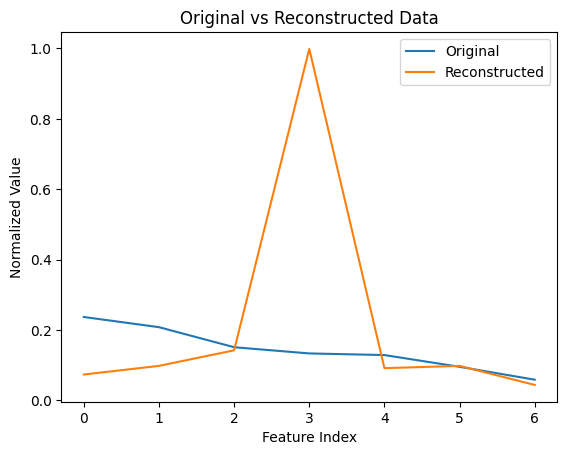

In [ ]:

# Read the dataset
data = pd.read_csv('daily_dataset.csv')
columns = ['LCLid', 'day', 'energy_median', 'energy_mean', 'energy_max', 'energy_count', 'energy_std', 'energy_sum', 'energy_min']

# Drop unnecessary columns
data.drop(['LCLid', 'day'], axis=1, inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Scale the data to a range between 0 and 1
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Set parameters
encoding_dim = 0.2  # Number of nodes in the encoding layer (adjust as needed)
epochs = 100
batch_size = 32

# Define the autoencoder architecture
input_dim = data_scaled.shape[1]  # Number of input features
input_layer = Input(shape=(input_dim,))
encoder_layer1 = Dense(32, activation='relu')(input_layer)
encoder_layer2 = Dense(16, activation='relu')(encoder_layer1)
encoder_layer3 = Dense(8, activation='relu')(encoder_layer2)
encoder_layer4 = Dense(encoding_dim, activation='relu')(encoder_layer3)


decoder_layer1 = Dense(8, activation='relu')(encoder_layer4)
decoder_layer2 = Dense(16, activation='relu')(decoder_layer1)
decoder_layer3 = Dense(32, activation='relu')(decoder_layer2)
decoder_layer4 = Dense(input_dim, activation='sigmoid')(decoder_layer3)
autoencoder = Model(input_layer, decoder_layer4)

# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(data_scaled, data_scaled, epochs=epochs, batch_size=batch_size, shuffle=True, verbose=2)

# Obtain the reconstructed output
reconstructed_data = autoencoder.predict(data_scaled)

# Calculate the reconstruction error
reconstruction_error = np.mean(np.square(data_scaled - reconstructed_data))

# Calculate data reduction percentage
data_reduction_percentage = (1 - encoding_dim / input_dim) * 100

print("Reconstruction Error:", reconstruction_error)
print("Data Reduction Percentage:", data_reduction_percentage)

# Plot the original and reconstructed data
plt.plot(data_scaled[0], label='Original')
plt.plot(reconstructed_data[0], label='Reconstructed')
plt.xlabel('Feature Index')
plt.ylabel('Normalized Value')
plt.title('Original vs Reconstructed Data')
plt.legend()
plt.show()
